# k-Nearest Neighbors (KNN) Algorithm

The k-Nearest Neighbors (KNN) algorithm is a simple and effective supervised machine learning algorithm used for classification and regression tasks. It makes predictions based on the majority class among its k-nearest neighbors (data points) in a feature space.

## Mathematical Formulation

Let's define the key components of the KNN algorithm:

- $X$: The dataset containing $N$ data points, where each data point is $x_i$ in a $d$-dimensional feature space, $x_i \in \mathbb{R}^d$.
- $Y$: The corresponding labels or target values for each data point $x_i$, where $Y = \{y_1, y_2, \ldots, y_N\}$.
- $k$: The number of nearest neighbors to consider for making predictions.
- $x_{\text{new}}$: The new data point for which we want to make a prediction.
- $y_{\text{new}}$: The predicted label or target value for $x_{\text{new}}$.

### Classification with KNN

In classification tasks, KNN predicts the class label for $x_{\text{new}}$ based on the majority class among its k-nearest neighbors. The class is determined by a simple majority vote:

$$ y_{\text{new}} = \arg\max_{c} \left( \sum_{i=1}^{k} \mathbb{I}(y_i = c) \right) $$

Where $c$ represents each class label, and $\mathbb{I}(y_i = c)$ is an indicator function that equals 1 if $y_i$ is of class $c$ and 0 otherwise.

### Regression with KNN

In regression tasks, KNN predicts the target value for $x_{\text{new}}$ based on the average of the target values among its k-nearest neighbors:

$$ y_{\text{new}} = \frac{1}{k} \sum_{i=1}^{k} y_i $$

## KNN Algorithm Steps

The KNN algorithm follows these steps:

1. **Choose the number of neighbors (k)**: Select an appropriate value for $k$, which represents the number of nearest neighbors to consider for predictions.

2. **Calculate distances**: Compute the distance between $x_{\text{new}}$ and all data points in the dataset. Common distance metrics include Euclidean distance, Manhattan distance, or others, depending on the problem.

3. **Find k-nearest neighbors**: Identify the k-nearest data points in the dataset based on the computed distances.

4. **Predict the class (classification) or target value (regression)**: For classification, use a majority vote among the k-nearest neighbors to predict the class of $x_{\text{new}}$. For regression, calculate the average target value among the k-nearest neighbors as the prediction.

KNN is a simple yet versatile algorithm with applications in various domains, including pattern recognition, recommendation systems, and image classification.


## Curse of Dimensionality

The "Curse of Dimensionality" is a phenomenon that occurs when dealing with high-dimensional data. As the number of dimensions increases, the data points tend to become sparse, and various problems related to computational complexity, distance measures, and generalization arise.

For any fixed $n$, it turns out that the difference between the minimum and the maximum distance between a random reference point $Q$ and a list of $n$ random data points $P_1, \ldots, P_n$ becomes indiscernible compared to the minimum distance $[14]$:

$$
\lim_{{d \to \infty}} E\left(\frac{{\operatorname{dist}_{\max} (d) - \operatorname{dist}_{\min} (d)}}{{\operatorname{dist}_{\min} (d)}}\right) \to 0.
$$

### Understanding the Curse of Dimensionality

The curse of dimensionality manifests in several ways:

#### 1. Data Sparsity

In high-dimensional spaces, data points tend to spread out, and the available data becomes sparse. This sparsity can make it challenging to find meaningful patterns in the data.

#### 2. Computational Complexity

Algorithms that rely on distance calculations (e.g., K-Means, K-Nearest Neighbors) become computationally expensive as the number of dimensions increases. The volume of the space grows exponentially with the number of dimensions, leading to increased processing times.

#### 3. Overfitting

In machine learning, models can overfit the training data in high-dimensional spaces. The model may capture noise in the data rather than the underlying patterns, leading to poor generalization to new data.

#### 4. Increased Sample Size Requirements

To maintain the same level of data density in high-dimensional spaces, exponentially larger sample sizes are required. This can be impractical or expensive in many real-world applications.

### Example in Python

Let's illustrate the curse of dimensionality with a simple example in Python. We'll generate random points in a high-dimensional space and observe the sparsity.


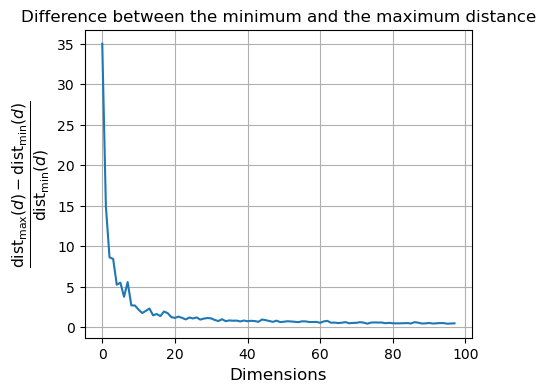

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of dimensions
dimensions = range(2, 100)

num_points = 1000
min_max_dist = []

for num_dimensions in dimensions:
    # Generate random data points in a high-dimensional space
    p = np.random.rand(num_points, num_dimensions)
    q = np.random.rand(1, num_dimensions)

    # Calculate the average distance between points
    distances = []
    for i in range(num_points):
        distance = np.linalg.norm(p[i] - q)
        distances.append(distance)
    min_max_dist.append((max(distances) - min(distances))/min(distances))

plt.figure(figsize=(5, 4))
plt.plot(min_max_dist)
plt.grid()
plt.xlabel("Dimensions", fontsize=12)
plt.ylabel(r"$\frac{{\operatorname{dist}_{\max} (d) - \operatorname{dist}_{\min} "
           r"(d)}}{{\operatorname{dist}_{\min} (d)}}$", fontsize=16)
plt.title(r"Difference between the minimum and the maximum distance")
plt.show()


### Selecting Number of Clusters

## Selecting the Number of Clusters in K-Means

The choice of the number of clusters ($K$) in K-Means clustering is a critical decision for the effectiveness of the algorithm. Two common methods for determining $K$ are the Elbow Method and the Silhouette Score.

### 1. Elbow Method

The Elbow Method aims to find the optimal $K$ by examining the trade-off between the sum of squared distances (inertia) of each point to its assigned cluster centroid and the number of clusters. Mathematically, the inertia ($I$) for $K$ clusters is calculated as:

$$ I(K) = \sum_{i=1}^{n} \min_{j=1}^{K} ||x_i - \mu_j||^2 $$

where $n$ is the number of data points, $K$ is the number of clusters, $x_i$ is a data point, and $\mu_j$ is the centroid of cluster $j$. The Elbow Method involves plotting $I(K)$ against different values of $K$ and identifying the "elbow" point, representing the optimal $K$.


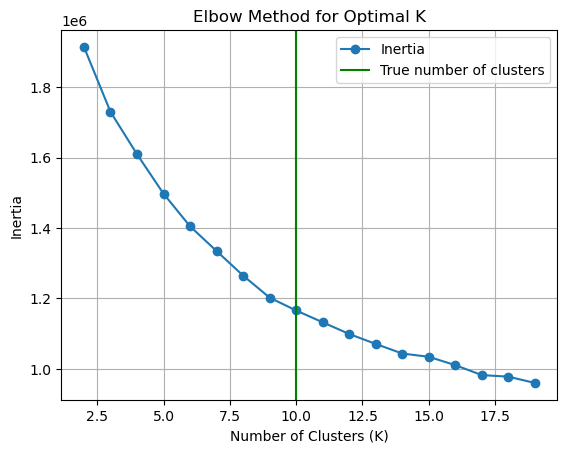

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits



# Generate synthetic data with three clusters
centers = 13
data, _ = make_blobs(n_samples=1000, centers=centers, random_state=42, cluster_std=0.3)


# Load the MNIST dataset
digits= load_digits()
data = digits.data 
centers = 10

# Instantiate KMeans with different values of K
inertia = []
for k in range(2, centers+10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


# Plot the Elbow curve
xs = list(range(2, len(inertia)+2))
plt.plot(xs, inertia, marker='o', label='Inertia')
plt.axvline(centers, color='g', label='True number of clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid()
plt.show()

### 2. Silhouette Score

The Silhouette Score quantifies the cohesion and separation of clusters. For each data point $i$, the Silhouette Score ($S(i)$) is given by:

$$ S(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} $$

where $a(i)$ is the average distance from the $i$-th data point to other points in the same cluster, and $b(i)$ is the smallest average distance from the $i$-th data point to points in a different cluster. The overall Silhouette Score for the dataset is the average of individual Silhouette Scores.

Choosing the $K$ that maximizes the Silhouette Score leads to well-defined and separated clusters.

These methods provide a mathematical foundation for determining the optimal number of clusters in K-Means clustering.

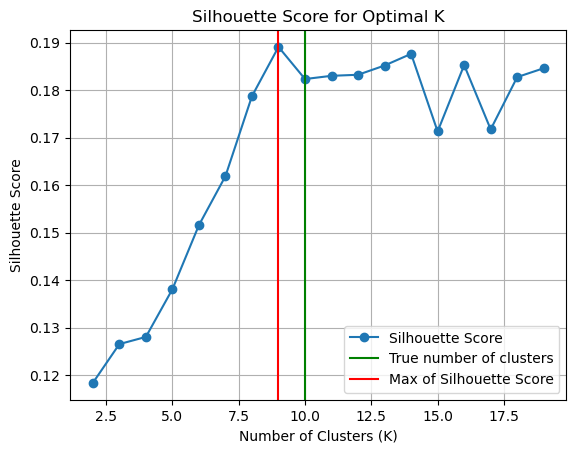

In [7]:
from sklearn.metrics import silhouette_score

# Instantiate KMeans with different values of K
sil_scores = []
for k in range(2, centers+10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(data)
    sil_scores.append(silhouette_score(data, labels))

# Plot Silhouette Scores
xs = list(range(2, len(inertia)+2))
plt.plot(xs, sil_scores, marker='o', label='Silhouette Score')
plt.axvline(centers, color='g', label='True number of clusters')
plt.axvline(xs[np.argmax(sil_scores)], color='r', label='Max of Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid()
plt.legend()
plt.show()
